<span class='main_title'>Natural Language Processing</span>
<hr>
<span class='author'>author:<a href='github.com/baiochi'>@baiochi<span>

# Notebook Configuration

## Libraries and APIs

In [1]:
# Terminal ASCII colors
WHITE = '\033[39m'; CYAN  = '\033[36m'; ORANGE = '\033[93m';
# Image drawing colors
BLUE   = '#00fafd'    # rgb(0,250,253)
YELLOW = '#f5b324'    # rgb(245,179,36)
# Styling notebook with CSS
from IPython.core.display import HTML
styles = open("./styles/custom.css", "r").read()
HTML(styles)

In [238]:
# Supress warnings
import warnings; warnings.filterwarnings('ignore')

from unidecode import unidecode
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Links:  
- https://spacy.io/usage/linguistic-features  
- https://www.ijrte.org/wp-content/uploads/papers/v7i6s/F03040376S19.pdf

## Functions

In [149]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, \
                            classification_report, ConfusionMatrixDisplay

def create_metrics_report(pipeline, X_train, X_test, y_train, y_test, 
                          print_metrics=True, plot_cm=True, plot_pr_roc=True):
    '''
    Calculate precitions for a aclassification model and display metrics.
    '''
    # Display Pipeline steps
    print(f'{CYAN}Pipeline settings:{WHITE}')
    display(pd.DataFrame.from_dict(pipeline.named_steps, orient='index', columns=['Steps']))
    
    # Make predictions
    y_pred_train = pipeline.predict(X_train)
    y_pred_test  = pipeline.predict(X_test)
    
    # Calculate Recall Precision
    y_scores = pipeline.predict_proba(X_test)[:,1]
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

    # Calculate ROC AUC scores
    fpr, tpr, tresholds = roc_curve(y_test, y_scores)
    score = round(roc_auc_score(y_test, y_scores),3)
    
    # Create Report Dataframe
    train_report = pd.DataFrame(classification_report(y_train, y_pred_train, output_dict=True))
    train_report.index = pd.MultiIndex.from_product([["Train Dataset"], train_report.index])
    test_report = pd.DataFrame(classification_report(y_test, y_pred_test, output_dict=True))
    test_report.index = pd.MultiIndex.from_product([["Test Dataset"], test_report.index])
    # Display
    if print_metrics:
        print(f'{CYAN}Classification metrics:{WHITE}')
        display(pd.concat([train_report,test_report]))
    
    # Plot Confusion Matrix
    if plot_cm:
        fig, axes = plt.subplots(1,2, figsize=(14,4))
        ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, ax=axes[0], colorbar=False)
        axes[0].set_title('Train data', fontsize=14)
        axes[0].grid(False)
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, ax=axes[1])
        axes[1].set_title('Test data',fontsize=14)
        axes[1].grid(False)
        fig.show()


    # Plot Precision Recall and ROC AUC curve
    if plot_pr_roc:
        fig, ax = plt.subplots(1,2, figsize=(14,4))

        # Precision Recall curve
        ax[0].plot(thresholds, precisions[:-1], label='Precision')
        ax[0].plot(thresholds, recalls[:-1], label='Recall', color='black')

        ax[0].set_title('Precision-Recall curve', fontsize=18, pad=20, loc='left')
        ax[0].set_xlabel('Tresholds cutoffs')
        ax[0].legend()

        # ROC AUC curve
        ax[1].plot(fpr, tpr, label=f'Classifier AUC={score}')
        ax[1].plot(np.linspace(0,1,100),np.linspace(0,1,100), ls=':', label='Random')

        ax[1].set_title('ROC curve', fontsize=18, pad=20, loc='left')
        ax[1].set_xlabel('False Positive Rate')
        ax[1].set_ylabel('True Positive Rate')
        ax[1].legend()
        plt.show()

In [177]:
def display_word_cloud(words:str, max_words=50, title=''):
    # Create Word Cloud
    word_cloud = WordCloud(max_words=max_words,
                            width=800, 
                            height=500,
                            background_color='#2b2b29',
                            colormap='coolwarm',
                            max_font_size = 120,
                            random_state=42).generate(words)
    # Display image
    plt.figure(figsize=(12,6))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.title(title + ' Word Cloud', size=18, pad=20, loc='left')
    plt.axis('off'); plt.grid(False); plt.show()

# NLTK Example

https://www.nltk.org/  
*Bird, Steven, Edward Loper and Ewan Klein (2009), Natural Language Processing with Python. O’Reilly Media Inc.*

In [3]:
import nltk
import svgling
# Download some packages to avoid LookupError
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/baiochi/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/baiochi/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/baiochi/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/baiochi/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/baiochi/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/baiochi/nltk_data...
[nltk_data]    |   Package movie_reviews is a

True

Tokenize texts

In [4]:
sentence = 'All work and no play makes Jack a dull boy.'
tokens = nltk.word_tokenize(sentence)
tokens

['All', 'work', 'and', 'no', 'play', 'makes', 'Jack', 'a', 'dull', 'boy', '.']

Tag tokens

In [5]:
tagged = nltk.pos_tag(tokens)
tagged[0:6]

[('All', 'DT'),
 ('work', 'NN'),
 ('and', 'CC'),
 ('no', 'DT'),
 ('play', 'NN'),
 ('makes', 'VBZ')]

Identify named entities

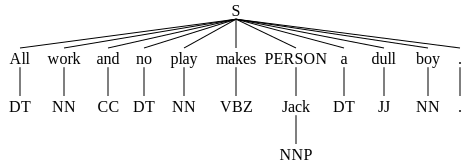

In [6]:
entities = nltk.chunk.ne_chunk(tagged)
entities

# Data Analysis

## Dataset Overview

**IMDB Dataset 50K Movie Reviews**  

About this Dataset  
IMDB dataset having 50K movie reviews for natural language processing or Text analytics.  
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well. Raw text and already processed bag of words formats are provided. See the README file contained in the release for more details.  

http://ai.stanford.edu/~amaas/data/sentiment/  
*Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. (2011). Learning Word Vectors for Sentiment Analysis. The 49th Annual Meeting of the Association for Computational Linguistics (ACL 2011).*

## Exploratory Data Analysis

### Descriptive analysis

In [7]:
df = pd.read_csv('data/npl/IMDB_Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Values distribuition:

In [8]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


There is not a single NaN values on the data.

In [9]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

This dataset it's perfectly balanced.

In [10]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

### Word Cloud visualization

In [181]:
all_words      = ' '.join(text for text in df['review'])
negative_words = ' '.join(text for text in df[df['sentiment']==0]['review'])
positive_words = ' '.join(text for text in df[df['sentiment']==1]['review'])

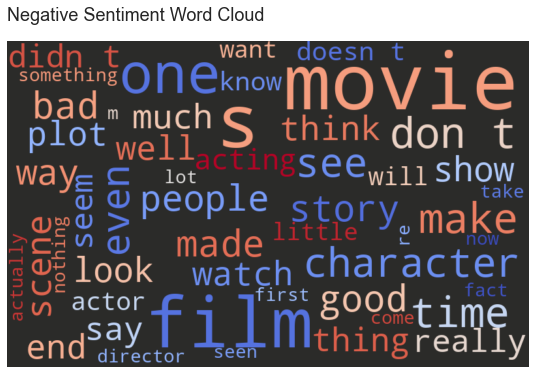

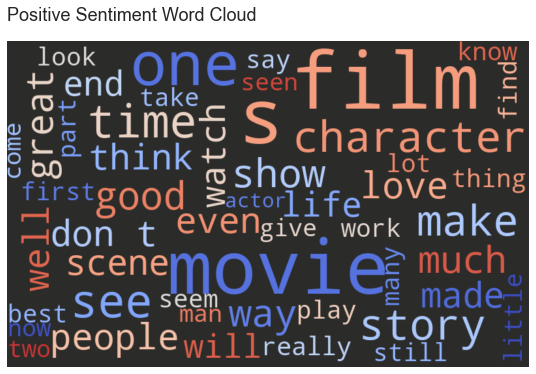

In [179]:
display_word_cloud(negative_words, title='Negative Sentiment')
display_word_cloud(positive_words, title='Positive Sentiment')

### Pareto Chart

Create tokens with `NLTK` library

In [230]:
from nltk import tokenize

# Create Tokenizer
space_tokenizer = tokenize.WhitespaceTokenizer()

# Generate Tokens
word_tokens = space_tokenizer.tokenize(all_words)

# Calculate Tokens Frequency
word_freq = nltk.FreqDist(word_tokens)

# Create Dataframe
word_freq_df = pd.DataFrame({
    'Word' : list(word_freq.keys()),
    'Frequency' : list(word_freq.values())
})
# Alternative: pd.Series(word_freq, name='Frequency').rename_axis('Word').reset_index()

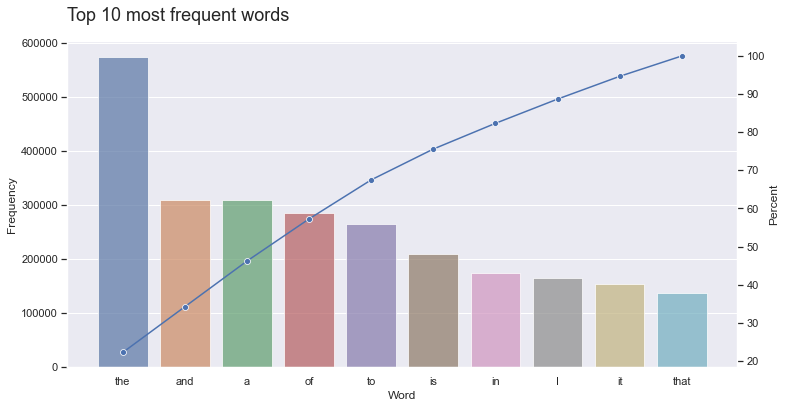

In [231]:
# Calculate cumsum for Frequency
cum_percent = top10_words['Frequency'].cumsum()/top10_words['Frequency'].sum()*100
cum_percent.reset_index(drop=True, name='Percent', inplace=True)

# Select only the top 10 most frequent words
top10_words = word_freq_df.nlargest(n=10, columns='Frequency')

# Pareto Chart
fig, ax1 = plt.subplots(figsize=(12,6))
plt.title('Top 10 most frequent words', size=18, pad=20, loc='left')
sns.barplot(data = top10_words, x='Word', y='Frequency', alpha=0.7, ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data = cum_percent, marker='o', ax=ax2)
plt.grid(False);

## Machine Learning

### Feature Engineering

Clean string by removing special characters and HTML tags.

In [11]:
remove_html_tag = lambda x : re.sub('<[^<]+?>', '', x)
remove_spc_char = lambda x : re.sub(r"[^a-zA-Z0-9]+", ' ', x)

# Remove HTML tags
df['review'] =  df['review'].apply(remove_html_tag)
# Transliterate Unicode text
df['review'] =  df['review'].apply(unidecode)
# Remove punctuation and special characters
df['review'] =  df['review'].apply(remove_spc_char)
# Normalize all letters to lower case
df['review'] =  df['review'].apply(str.lower)

df['review'].head()

0    One of the other reviewers has mentioned that ...
1    A wonderful little production The filming tech...
2    I thought this was a wonderful way to spend ti...
3    Basically there s a family where a little boy ...
4    Petter Mattei s Love in the Time of Money is a...
Name: review, dtype: object

Change target labels.

In [12]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [13]:
df['sentiment'] = df['sentiment'].replace({'negative':0, 'positive':1})
df['sentiment'].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

### Split data into train/test

In [14]:
from sklearn.model_selection import train_test_split

X = df['review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Preprocessing data

Example of creating a **bag of words** with [`CountVectorizer`](#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

bag_of_words = vectorizer.fit_transform(X_train)

In [16]:
# Transform sparse matrix into a dataframe
bag_of_words_df = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                              columns=vectorizer.get_feature_names())
bag_of_words_df.shape

(40000, 94328)

### Create Model

Set sklearn `Pipeline` with `LogisticRegression` model. 

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf_pipeline = Pipeline([('cv', CountVectorizer()),
                         ('lr', LogisticRegression(random_state=42))
                        ])

clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('cv', CountVectorizer()),
                ('lr', LogisticRegression(random_state=42))])

In [18]:
y_pred_train = clf_pipeline.predict(X_train)
y_pred_test = clf_pipeline.predict(X_test)

### Metrics report

Pipeline settings:


,Steps
cv,CountVectorizer()
lr,LogisticRegression(random_state=42)


Classification metrics:


0             1  accuracy     macro avg  \
Train Dataset precision      0.967532      0.965069    0.9663      0.966301   
              recall         0.965118      0.967487    0.9663      0.966302   
              f1-score       0.966324      0.966276    0.9663      0.966300   
              support    20039.000000  19961.000000    0.9663  40000.000000   
Test Dataset  precision      0.894769      0.883122    0.8888      0.888946   
              recall         0.879258      0.898194    0.8888      0.888726   
              f1-score       0.886946      0.890594    0.8888      0.888770   
              support     4961.000000   5039.000000    0.8888  10000.000000   

                         weighted avg  
Train Dataset precision      0.966303  
              recall         0.966300  
              f1-score       0.966300  
              support    40000.000000  
Test Dataset  precision      0.888900  
              recall         0.888800  
              f1-score       0.888784  
              support    10000.000000

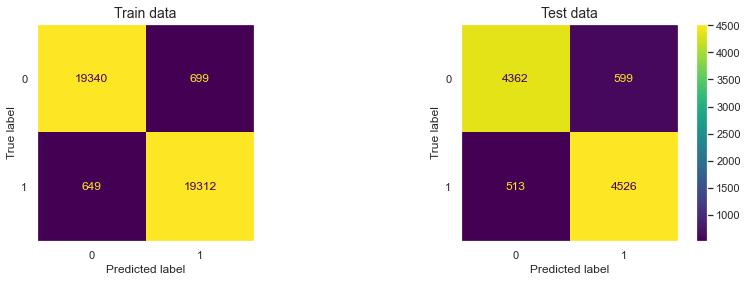

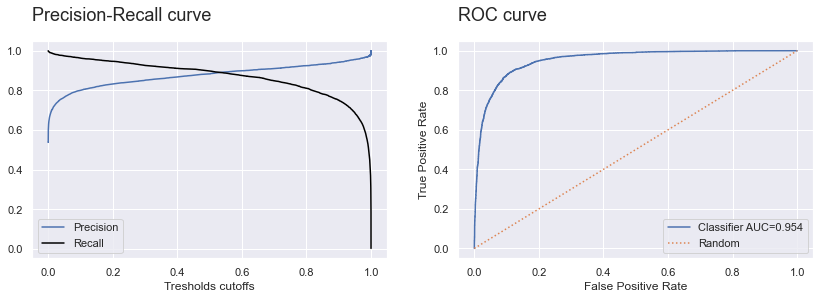

In [150]:
create_metrics_report(clf_pipeline, X_train, X_test, y_train, y_test)

## Create Word Cloud

### Word Cloud Example

In [25]:
from wordcloud import WordCloud

# Create text with all words
words = ' '.join(text for text in df['review'])

# Instance word cloud object with the following parameters
word_cloud = WordCloud(max_words=50,
                       width=800, 
                       height=500,
                       max_font_size=120)
# Generate word cloud
word_cloud.generate(words)

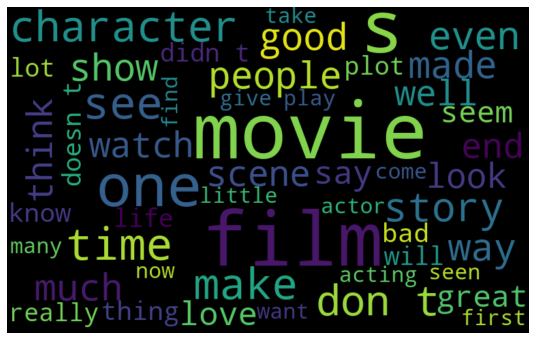

In [26]:
# Plot word cloud
plt.figure(figsize=(12,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.grid(False)
plt.show()

### Splitting results

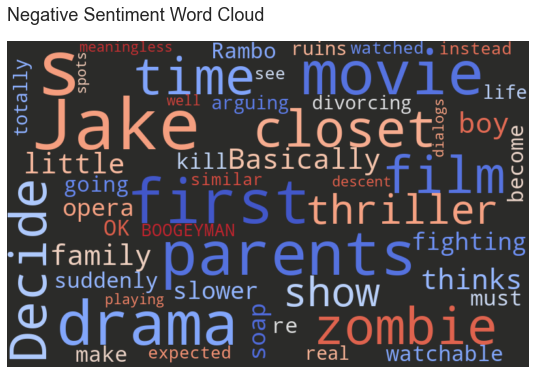

In [175]:
negative_words = ' '.join(text for text in df[df['sentiment']==0]['review'])

negative_word_cloud = WordCloud(max_words=50,
                                width= 800, 
                                height= 500,
                                background_color='#2b2b29',
                                colormap='coolwarm',
                                max_font_size = 120,
                                random_state=42).generate(negative_words[:1000])
plt.figure(figsize=(12,6))
plt.imshow(negative_word_cloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud', size=18, pad=20, loc='left')
plt.axis('off'); plt.grid(False); plt.show()

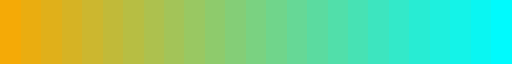

In [28]:
# Custom colormap
from matplotlib.colors import LinearSegmentedColormap
#f5b324, #00fafd
custom_colormap = LinearSegmentedColormap.from_list('my_colormap', ['#f5aa06', '#00fafd'], N=25)
custom_colormap

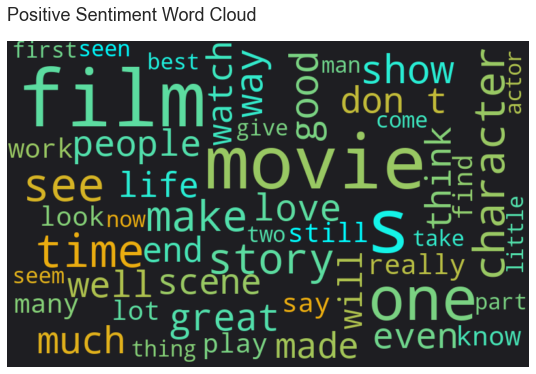

In [29]:
positive_words = ' '.join(text for text in df[df['sentiment']==1]['review'])

positive_word_cloud = WordCloud(max_words=50,
                                width= 800, 
                                height= 500,
                                max_font_size = 120,
                                colormap=custom_colormap,
                                background_color='#1e1e22').generate(positive_words)
plt.figure(figsize=(12,6))
plt.imshow(positive_word_cloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud', size=18, pad=20, loc='left')
plt.axis('off'); plt.grid(False); plt.show()

# Analysing Data with `NLTK`

In [30]:
phrase = ['A bad movie', 'A good movie']

nltk.FreqDist(phrase)

FreqDist({'A bad movie': 1, 'A good movie': 1})

In [33]:
from nltk import tokenize

# Example phrase
phrase = 'Welcome to PNL world!'

# Create Tokenizer
token_space = tokenize.WhitespaceTokenizer()
token_space

WhitespaceTokenizer(pattern='\\s+', gaps=True, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [35]:
# Generate Tokens
token_phrase = token_space.tokenize(phrase)
token_phrase

['Welcome', 'to', 'PNL', 'world!']

In [38]:
token_words = token_space.tokenize(words)
print(f'Number of tokens: {len(token_words)}')
token_words[:10]

Number of tokens: 11775500


['One',
 'of',
 'the',
 'other',
 'reviewers',
 'has',
 'mentioned',
 'that',
 'after',
 'watching']

In [41]:
# Calculate Tokens Frequency
word_freq = nltk.FreqDist(token_words)
word_freq

FreqDist({'the': 574896, 'and': 310249, 'a': 309817, 'of': 285917, 'to': 264666, 'is': 209006, 'in': 174514, 'I': 164418, 'it': 154277, 'that': 138230, ...})

In [42]:
word_freq_df = pd.DataFrame({
    'Word' : list(word_freq.keys()),
    'Frequency' : list(word_freq.values())
})
# Alternative: pd.Series(word_freq, name='Frequency').rename_axis('Word').reset_index()

word_freq_df.head()

,Word,Frequency
0,One,4616
1,of,285917
2,the,574896
3,other,17465
4,reviewers,485


In [78]:
word_freq_df.nlargest(n=10, columns='Frequency')

,Word,Frequency
2,the,574896
37,and,310249
49,a,309817
1,of,285917
61,to,264666
23,is,209006
43,in,174514
120,I,164418
127,it,154277
7,that,138230


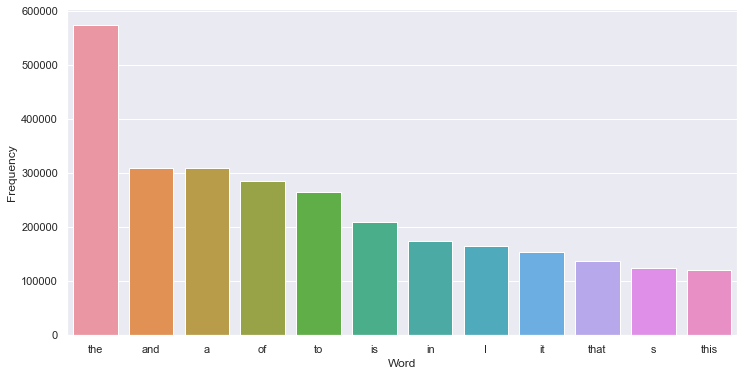

In [85]:
plt.figure(figsize=(12,6))
sns.barplot(data=word_freq_df.nlargest(n=12, columns='Frequency'), 
            x='Word', 
            y='Frequency');

In [90]:
# Get stop words
stop_words = nltk.corpus.stopwords.words('english')
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [93]:
# Remove stop words from dataframe
word_freq_df = word_freq_df[~word_freq_df['Word'].isin(stop_words)].reset_index(drop=True)
word_freq_df

,Word,Frequency
0,One,4616
1,reviewers,485
2,mentioned,1078
3,watching,8673
4,1,4281
...,...,...
131489,hyuck,3
131490,effortful,1
131491,clatter,1
131492,Farely,1


In [112]:
# Add new column to original dataframe with reviews without stopwords

df['processed_reviews'] = df['review'].apply(lambda row : ' '.join(word for word in row.split() if word.lower() not in stop_words) )
df.head()

,review,sentiment,processed_reviews
0,One of the other reviewers has mentioned that ...,1,One reviewers mentioned watching 1 Oz episode ...
1,A wonderful little production The filming tech...,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,Basically there s a family where a little boy ...,0,Basically family little boy Jake thinks zombie...
4,Petter Mattei s Love in the Time of Money is a...,1,Petter Mattei Love Time Money visually stunnin...


In [248]:
nltk.download('rslp')
nltk.RSLPStemmer()

[nltk_data] Downloading package rslp to /Users/baiochi/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [256]:
nltk.RSLPStemmer().stem('atacar')

'atac'

In [285]:
stemmer = nltk.stem.PorterStemmer()
stemmer.stem('watching')

'watch'

In [286]:
df['processed_reviews'].head().apply(lambda x : ' '.join(stemmer.stem(word) for word in x.split()) )

0    one review mention watch 1 oz episod hook righ...
1    wonder littl product film techniqu unassum old...
2    thought wonder way spend time hot summer weeke...
3    basic famili littl boy jake think zombi closet...
4    petter mattei love time money visual stun film...
Name: processed_reviews, dtype: object

In [348]:
score_weights = pd.DataFrame(
    clf_pipeline[1].coef_[0],
    index = clf_pipeline[0].get_feature_names()
)

In [349]:
score_weights.nlargest(10, columns=0)

,0
refreshing,1.993561
subtle,1.627037
wonderfully,1.486452
perfectly,1.468820
surprisingly,1.467421
funniest,1.414287
beautifully,1.385750
gem,1.371947
rare,1.341040
solid,1.335609


In [351]:
score_weights.nsmallest(10, columns=0)

,0
waste,-2.751178
disappointment,-2.505139
lacks,-2.279201
poorly,-2.110140
forgettable,-1.994547
mst3k,-1.880619
disappointing,-1.859875
laughable,-1.847397
mediocre,-1.744753
unfunny,-1.724276


In [337]:
clf_pipeline[1].coef_

array([[ 0.04487785, -0.1232879 , -0.00775939, ..., -0.00551931,
        -0.00136215, -0.00136215]])

# Regex

In [353]:
pt_url = 'https://caelum-online-public.s3.amazonaws.com/1321-nlp-modelos-linguagem/Dados+csv/stackoverflow_portugues.csv'
en_url = 'https://caelum-online-public.s3.amazonaws.com/1321-nlp-modelos-linguagem/Dados+csv/stackoverflow_ingles.csv'
es_url = 'https://caelum-online-public.s3.amazonaws.com/1321-nlp-modelos-linguagem/Dados+csv/stackoverflow_espanhol.csv'

In [354]:
pt_df = pd.read_csv(pt_url)
en_df = pd.read_csv(en_url)
es_df = pd.read_csv(es_url)